## 토픽분류
* LSA
* LDA
* 활용 주제 분석

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import re
from datetime import datetime, timedelta,date
import sys

In [2]:
def getSub():
    dbname='navernews.db'
    with sqlite3.connect(dbname) as conn:
        cursor=conn.cursor()
        sql='select sarticle from subnews '
        res=cursor.execute(sql).fetchall()
        result=[]
        for r in res:
            result.append(r[0])
            
    return result


In [3]:
docs=getSub()
len(docs)

220

In [4]:
from konlpy.tag import Kkma
kkma=Kkma()

In [5]:
def dictsort(r):
    sr=sorted(r.items(),key=(lambda x:x[1]),reverse=True)
    return r

In [6]:
def getPOS(rres):
    p=kkma.pos(rres)
    dictpos={}
    words=[]
    #표제어 추출
    check=['NNG','NNP','NNB','NNM','VV','VA','VXV','VXA','VCP','VCN','SF','EFN','EFQ']
    for  w,pos in p:
        if(pos in check):
            words.append(w)
            if (w in dictpos.keys()):
                dictpos[w]+=1
            else:
                dictpos[w]=1
    return (dictpos,words)  

In [7]:
docs[0]

'\n신세계그룹 제공 정용진 신세계그룹 부회장이 지난해 연봉으로 33억 6800만 원을 받았다. 신세계 그룹 총수 일가는 총 142억 원을 수령했다.17일 신세계·이마트 사업보고서에 따르면 정 부회장은 지난해 이마트에서 총 33억 6800만 원을 받았다. 급여 20억 3400만 원과 상여 13억 3400만 원이다.이마트 측은 “어려운 대내외 경영 환경 속에서도 매출액 14조 2138억 원과 영업이익 2950억 원을 달성한 점을 고려했다”고 밝혔다.\n\n동생 정유경 신세계 총괄사장은 급여와 상여금 각각 17억 9400만 원, 11억 6600만 원으로 총 29억 6000만 원을 수령했다.\n주요기사\n\n산사태까지 난 땅…용인시 공무원 매입 11일뒤 ‘특구’ 발표원로가 전한 시대정신과 인재론‘윤석열의 정치’ 보인다\n\n신세계 측은 “기존 백화점 경쟁력 강화로 어려운 대내외 환경 속에서도 영업이익 1268억 원을 달성한 점을 고려했다”고 전했다. 정 부회장과 정 총괄사장 모두 연봉이 전년 대비 감소한 것으로 나타났다. 정 부회장은 약 1억 9400만 원, 정 총괄사장은 1억 5400만 원가량을 덜 받았다. 이는 신종 코로나바이러스 감염증(코로나19) 사태로 실적이 감소한 영향으로 보인다.이명희 신세계그룹 회장은 이마트에서 26억 9300만 원, 신세계에서 12억 6100만 원으로 총 39억 5400만 원을 받았다. 정재은 명예회장도 이와 동일한 연봉을 수령했다.김혜린 동아닷컴 기자 sinnala8@donga.com\n'

In [8]:
def getCorpus(doc):
    getp=getPOS(doc)
    sen=' '.join(getp[1])
    return sen

In [9]:
corpus=[]
for doc in docs:
    getp=getCorpus(doc)
    corpus.append(getp)
print(corpus[0])

신세계 그룹 제공 정 용진 신세계 그룹 부회장 지난해 연봉 원 받 다 . 신세계 그룹 총수 일가 원 수령 다 . 일 신세계 마트 사업 보고서 따르 정 부회장 지난해 이 마트 총 원 받 다 . 급여 원 상여 원 이 다 . 마트 측 어렵 대내외 경영 환경 속 매출액 원 영업 이익 원 달성 점 고려 고 밝히 다 . 동생 정유 경 신세계 총괄 사장 급여 상여금 원 원 총 원 수령 다 . 주요 기사 산사태 낳 땅 용인시 공무원 매입 일 뒤 특구 발표 원로 전하 시대정신 인재 윤 열의 정치 보이 신세계 측 기존 백화점 경쟁력 강화 어렵 대내외 환경 속 영업 이익 원 달성 점 고려 고 전하 다 . 정 부회장 정 총괄 사장 모두 연봉 전년 대비 감소 것 나타나 다 . 정 부회장 원 정 총괄 사장 원 가량 받 다 . 일 신종 코로나 바 감염증 코로나 사태 실적 감소 영향 보이 ㄴ다 . 이명 희 세계 그룹 회장 마트 원 신세계 원 총 원 받 다 . 정재 은 명예 회장 동일 연봉 수령 다 . 김 동아 닷컴 기자 .


In [10]:
print(len(corpus))

220


In [11]:
# 카운트 기반 TDM
# min_df document frequency 문서내 발견 횟수
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(min_df=6,ngram_range=(1,3))
tdm=vect.fit_transform(corpus).toarray()
tdm.shape

(220, 1473)

In [12]:
#words=list(vect.vocabulary_.keys())# 전체 단어 갯수 파악용
words=list(vect.get_feature_names())
#print(words)
i=0
for td in tdm:
    zt=list(zip(words,td))
    szt=sorted(zt,key=(lambda x:x[1]),reverse=True)
    #print(corpus[i])
    #print(szt[:5])
    i+=1

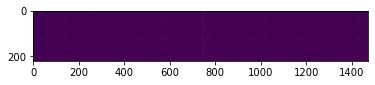

In [13]:
plt.imshow(tdm)

In [14]:
# TF-IDF 방식으로 중요단어 가중치
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv=TfidfVectorizer(min_df=6,ngram_range=(1,3))
tfm=tfidfv.fit_transform(corpus).toarray()

array([[0.02756034, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08433416, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01859491, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

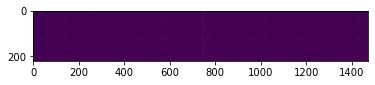

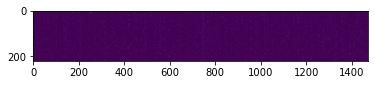

In [15]:
plt.imshow(tdm)
plt.show()
plt.imshow(tfm)
plt.show()

In [16]:
#tfidfv.vocabulary_

In [17]:
# 주제 분석(모델링) Topic modeling
from sklearn.decomposition import TruncatedSVD
svdm=TruncatedSVD()
svdm.fit(tfm)

TruncatedSVD()

In [18]:
components=svdm.components_
np.shape(components)

(2, 1473)

In [19]:
voca=list(tfidfv.get_feature_names())

In [20]:
voca[:5]

['ㄴ다', 'ㄴ다 대표', 'ㄴ다 마트', 'ㄴ다 신세계', 'ㄴ다 신세계 그룹']

In [21]:
def makeDict(components,voca):
    res=[]
    for c in components:
        dict={}
        for i,v in enumerate(c):
            dict[voca[i]]=v
        res.append(dict)
    return res    

In [22]:
res=makeDict(components,voca)
for r in res:
    print("*"*50)
    sr=sorted(r.items(),key=(lambda x:x[1]),reverse=True)
    print(sr[:5])

**************************************************
[('신세계', 0.28482726199781455), ('백화점', 0.16382427440602043), ('ㄴ다', 0.15741673605499054), ('브랜드', 0.1282584916552867), ('고객', 0.11899758997049649)]
**************************************************
[('신세계 신세계', 0.14367466575609658), ('유통', 0.1201883695457612), ('사업', 0.11048759364946169), ('테일', 0.08390054992334035), ('경계 허문', 0.08378763956681282)]


In [23]:
### LDA
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=5)
lda.fit(tfm)
components=lda.components_
voca=list(tfidfv.get_feature_names())
print(np.shape(components))

(5, 1473)


In [24]:
res=makeDict(components,voca)
for r in res:
    print("*"*50)
    sr=sorted(r.items(),key=(lambda x:x[1]),reverse=True)
    print(sr[:5])

**************************************************
[('푸드', 5.842603666945424), ('신세계 푸드', 5.344366367841177), ('케이크', 2.589150014775623), ('사장', 2.4026540425156604), ('포장', 2.056829207865841)]
**************************************************
[('지향', 0.20026137172609024), ('교체', 0.20018383951656266), ('탄생', 0.20016473145638813), ('건설', 0.20016280345909107), ('생활 용품', 0.20016125667006113)]
**************************************************
[('광주', 4.71395069039284), ('광주 신세계', 3.92238370501456), ('대표 이사', 3.7835221570881012), ('이사', 3.7452700036787925), ('대표', 3.285973797778938)]
**************************************************
[('신세계', 17.61861553015465), ('ㄴ다', 11.523375105650288), ('백화점', 10.341086739823576), ('브랜드', 9.18731083018992), ('고객', 8.626752490490261)]
**************************************************
[('호텔', 2.6700349966843118), ('조선', 2.565227645975191), ('조선 호텔', 1.901196207260112), ('신세계 조선 호텔', 1.417323413124059), ('신세계 조선', 1.4173234131070733)]


In [25]:
#numpy 다시 깔기: ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject
# anaconda prompt
#!pip uninstall numpy
#!pip install numpy --user
#!pip install gensim
# gensim 기능 확장 Levenshtein 거리 사용  pip install python-Levenshtein


In [26]:
corpus[:2]

['신세계 그룹 제공 정 용진 신세계 그룹 부회장 지난해 연봉 원 받 다 . 신세계 그룹 총수 일가 원 수령 다 . 일 신세계 마트 사업 보고서 따르 정 부회장 지난해 이 마트 총 원 받 다 . 급여 원 상여 원 이 다 . 마트 측 어렵 대내외 경영 환경 속 매출액 원 영업 이익 원 달성 점 고려 고 밝히 다 . 동생 정유 경 신세계 총괄 사장 급여 상여금 원 원 총 원 수령 다 . 주요 기사 산사태 낳 땅 용인시 공무원 매입 일 뒤 특구 발표 원로 전하 시대정신 인재 윤 열의 정치 보이 신세계 측 기존 백화점 경쟁력 강화 어렵 대내외 환경 속 영업 이익 원 달성 점 고려 고 전하 다 . 정 부회장 정 총괄 사장 모두 연봉 전년 대비 감소 것 나타나 다 . 정 부회장 원 정 총괄 사장 원 가량 받 다 . 일 신종 코로나 바 감염증 코로나 사태 실적 감소 영향 보이 ㄴ다 . 이명 희 세계 그룹 회장 마트 원 신세계 원 총 원 받 다 . 정재 은 명예 회장 동일 연봉 수령 다 . 김 동아 닷컴 기자 .',
 '정 용진 신세계 그룹 부회장 . 이미지 출처 연합 뉴스 낫 아시아 경제 임 춘한 기자 신세계 그룹 총수 일가 지난해 신세계 마트 원 가량 보수 받으 것 나타나 다 . 일 신세계 마트 사업 보고서 따르 정 용진 신세계 그룹 부회장 지난해 이 마트 급여 원 명절 상여 성과급 등 해지 상여 원 등 원 받 다 . 정 유경 신세계 총괄 사장 신세계 급여 원 상여 원 등 원 받 다 . 정 부회장 연봉 년 원 원 줄 다 . 정 총괄 사장 연봉 년 원 대비 원 감소 다 . 정 부회장 정 총괄 사장 모친 이 이명 희 세계 그룹 회장 지난해 신세계 원 마트 원 등 원 연봉 받 회장 남편 이 정재 은 신세계 그룹 명예 회장 같 액수 수령 다 . 신세계 그룹 관계자 정 부회장 정 총괄 사장 연봉 전년 대비 감소 이유 대하 코로나 업 황 영향 있 보 회사 실적 연동 상여 줄 보수 감소 고 말하 다 .']

In [27]:
corpus_w=[]
for c in corpus:
    cs=c.split(' ')
    corpus_w.append(cs)
corpus_w[:2]

[['신세계',
  '그룹',
  '제공',
  '정',
  '용진',
  '신세계',
  '그룹',
  '부회장',
  '지난해',
  '연봉',
  '원',
  '받',
  '다',
  '.',
  '신세계',
  '그룹',
  '총수',
  '일가',
  '원',
  '수령',
  '다',
  '.',
  '일',
  '신세계',
  '마트',
  '사업',
  '보고서',
  '따르',
  '정',
  '부회장',
  '지난해',
  '이',
  '마트',
  '총',
  '원',
  '받',
  '다',
  '.',
  '급여',
  '원',
  '상여',
  '원',
  '이',
  '다',
  '.',
  '마트',
  '측',
  '어렵',
  '대내외',
  '경영',
  '환경',
  '속',
  '매출액',
  '원',
  '영업',
  '이익',
  '원',
  '달성',
  '점',
  '고려',
  '고',
  '밝히',
  '다',
  '.',
  '동생',
  '정유',
  '경',
  '신세계',
  '총괄',
  '사장',
  '급여',
  '상여금',
  '원',
  '원',
  '총',
  '원',
  '수령',
  '다',
  '.',
  '주요',
  '기사',
  '산사태',
  '낳',
  '땅',
  '용인시',
  '공무원',
  '매입',
  '일',
  '뒤',
  '특구',
  '발표',
  '원로',
  '전하',
  '시대정신',
  '인재',
  '윤',
  '열의',
  '정치',
  '보이',
  '신세계',
  '측',
  '기존',
  '백화점',
  '경쟁력',
  '강화',
  '어렵',
  '대내외',
  '환경',
  '속',
  '영업',
  '이익',
  '원',
  '달성',
  '점',
  '고려',
  '고',
  '전하',
  '다',
  '.',
  '정',
  '부회장',
  '정',
  '총괄',
  '사장',
  '모두',
  '연봉',
  '전년',
  '대비',
  '

In [28]:
from gensim import corpora
cor_dict=corpora.Dictionary(corpus_w)
cor_dict[1]

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


'ㄴ다'

In [29]:
corpus_m=[]
for cor in corpus_w:
    res=cor_dict.doc2bow(cor)
    corpus_m.append(res)
corpus_m[0]

[(0, 13),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 2),
 (11, 2),
 (12, 1),
 (13, 4),
 (14, 2),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 11),
 (22, 2),
 (23, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 4),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 4),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 2),
 (44, 4),
 (45, 1),
 (46, 3),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 2),
 (53, 3),
 (54, 1),
 (55, 7),
 (56, 1),
 (57, 1),
 (58, 2),
 (59, 3),
 (60, 1),
 (61, 2),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 16),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 2),
 (70, 1),
 (71, 2),
 (72, 1),
 (73, 3),
 (74, 1),
 (75, 1),
 (76, 2),
 (77, 2),
 (78, 6),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 2),
 (85, 3),
 (86, 3),
 (87, 1),
 (88, 2),
 (89, 2),
 (90, 1),
 (91, 2),
 (92, 2),
 (93, 1)]

In [30]:
import gensim
N_TOPIC=10
N_PASS=10
ldagen=gensim.models.ldamodel.LdaModel(corpus_m,num_topics=N_TOPIC,id2word=cor_dict,passes=N_PASS) 
topics=ldagen.print_topics()
topics


[(0,
  '0.042*"." + 0.030*"다" + 0.018*"신세계" + 0.014*"이" + 0.012*"있" + 0.011*"ㄴ다" + 0.010*"일" + 0.009*"원" + 0.009*"시" + 0.008*"면세점"'),
 (1,
  '0.036*"." + 0.029*"다" + 0.028*"이" + 0.014*"있" + 0.012*"호텔" + 0.010*"등" + 0.009*"신세계" + 0.009*"티" + 0.008*"비" + 0.008*"수"'),
 (2,
  '0.045*"." + 0.038*"다" + 0.020*"신세계" + 0.018*"이" + 0.016*"있" + 0.010*"와인" + 0.010*"등" + 0.010*"백화점" + 0.008*"수" + 0.007*"원"'),
 (3,
  '0.024*"." + 0.014*"다" + 0.013*"쇼핑" + 0.012*"이" + 0.011*"홈" + 0.010*"있" + 0.009*"호텔" + 0.007*"ㄴ다" + 0.007*"롯데" + 0.007*"필드"'),
 (4,
  '0.031*"." + 0.029*"다" + 0.027*"신세계" + 0.027*"원" + 0.021*"분기" + 0.019*"영업" + 0.018*"매출" + 0.014*"이익" + 0.013*"백화점" + 0.012*"실적"'),
 (5,
  '0.044*"신세계" + 0.028*"." + 0.026*"유통" + 0.026*"중" + 0.024*"사업" + 0.018*"등" + 0.018*"일" + 0.016*"대비" + 0.016*"전" + 0.015*"백화점"'),
 (6,
  '0.039*"." + 0.031*"신세계" + 0.029*"다" + 0.023*"이" + 0.018*"네이버" + 0.014*"대표" + 0.013*"그룹" + 0.012*"마트" + 0.011*"등" + 0.010*"담당"'),
 (7,
  '0.049*"." + 0.034*"다" + 0.020*"신세계" + 0.018*"이"

In [31]:
#! pip install pyLDAvis
# conda install pandas --force-reinstall

In [32]:
# import pyLDAvis.gensim  구버전 3.7이하로 예상됨
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(ldagen,corpus_m,cor_dict)
pyLDAvis.display(vis)

### 최적의 토픽 갯수는?
* Perplexity
    - 혼란한 정도 : 낮을 수로 좋다
    - 모델간 비교에서 상대적 우위
    - 수치적 한계 -> 실제 해석상 무리가 있을 수도 있음
    
* Coherence
    - 주제의 일관성 : 높을수록 좋다
    - 주제를 이루는 단어들의 유사성으로 파악
    - 수치적 한계
    - 상대적 한계

In [34]:
# 상대적 분석
from gensim.models.coherencemodel import CoherenceModel
N_PASS=10
x=[]
ycoh=[]
yperp=[]
for i in range(2,20):
    N_TOPIC=i
    ldagen=gensim.models.ldamodel.LdaModel(corpus_m,num_topics=N_TOPIC,id2word=cor_dict,passes=N_PASS) 
    cm=CoherenceModel(model=ldagen,corpus=corpus_m,coherence='u_mass')
    coh=cm.get_coherence()
    perp=ldagen.log_perplexity(corpus_m)
    x.append(i)
    ycoh.append(coh)
    yperp.append(perp)
    print('coherence:',coh,'perpleixty:',perp)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


coherence: -0.671734974415777 perpleixty: -7.018963334230814
coherence: -0.7838331913996693 perpleixty: -6.951464615715066
coherence: -0.8351051703395705 perpleixty: -6.940068136555735
coherence: -0.8584127754847047 perpleixty: -6.94577308883348
coherence: -1.4853776294325096 perpleixty: -6.940572798479545
coherence: -0.921322293997368 perpleixty: -6.937035033495432
coherence: -1.109250321791627 perpleixty: -6.928915470728273
coherence: -1.1933121327808986 perpleixty: -6.9022431243421565
coherence: -1.5698290218973754 perpleixty: -6.9131573877628405
coherence: -1.2341916252158467 perpleixty: -6.920099040793445
coherence: -1.6477446747270177 perpleixty: -6.959108518783256
coherence: -1.5186857157152311 perpleixty: -6.937092027896828
coherence: -1.5617743005925 perpleixty: -6.9279465990486875
coherence: -1.737203511121664 perpleixty: -6.945453545129734
coherence: -1.809210848476711 perpleixty: -6.910951657013581
coherence: -1.541837011939149 perpleixty: -6.946121951485295
coherence: -1.6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


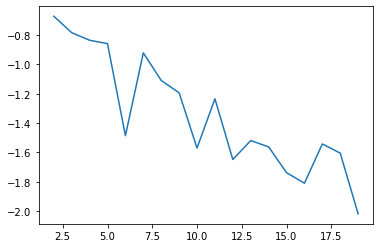

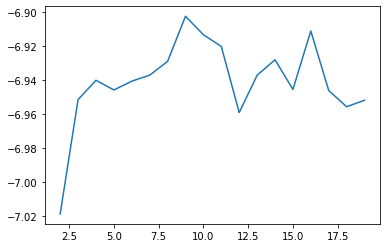

In [37]:
plt.plot(x,ycoh)
plt.show()
plt.plot(x,yperp)
plt.show()

In [38]:
# 상대적 분석
from gensim.models.coherencemodel import CoherenceModel
N_TOPIC=2
x=[]
ycoh=[]
yperp=[]
for i in range(2,20):
    N_PASS=i
    ldagen=gensim.models.ldamodel.LdaModel(corpus_m,num_topics=N_TOPIC,id2word=cor_dict,passes=N_PASS) 
    cm=CoherenceModel(model=ldagen,corpus=corpus_m,coherence='u_mass')
    coh=cm.get_coherence()
    perp=ldagen.log_perplexity(corpus_m)
    x.append(i)
    ycoh.append(coh)
    yperp.append(perp)
    print('coherence:',coh,'perpleixty:',perp)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


coherence: -0.6322661054127647 perpleixty: -7.068060475717244
coherence: -0.6014083314657366 perpleixty: -7.042834705518759
coherence: -0.6657301786522207 perpleixty: -7.0315177813738785
coherence: -0.6531987235776684 perpleixty: -7.056119454083451
coherence: -0.694493737823418 perpleixty: -7.027437527609165
coherence: -0.8991434908421274 perpleixty: -7.0261997994450835
coherence: -0.6536269773979355 perpleixty: -7.015415194606242
coherence: -0.5918867594355879 perpleixty: -7.009558504037961
coherence: -0.7759208511623771 perpleixty: -7.055488338521943
coherence: -0.6122426204799143 perpleixty: -6.986288218199044
coherence: -0.6697657772778138 perpleixty: -6.993603055505676
coherence: -0.7792196325802669 perpleixty: -7.023041498823695
coherence: -0.621518739027275 perpleixty: -7.021657877022073
coherence: -0.6867602936275738 perpleixty: -7.002691808538239
coherence: -0.6362326639164158 perpleixty: -6.994537968695417
coherence: -0.7009664443390448 perpleixty: -6.9871774652134295
coheren

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


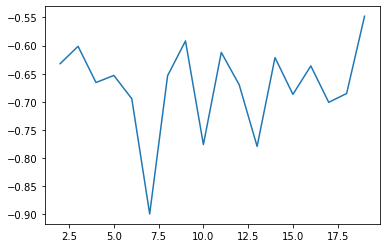

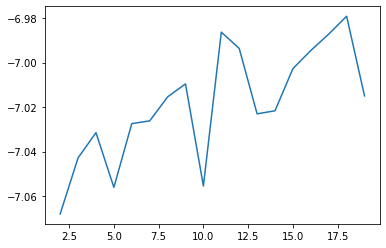

In [39]:
plt.plot(x,ycoh)
plt.show()
plt.plot(x,yperp)
plt.title('perplexity')
plt.show()


In [40]:
N_PASS=10
N_TOPIC=2
ldagen=gensim.models.ldamodel.LdaModel(corpus_m,num_topics=N_TOPIC,id2word=cor_dict,passes=N_PASS) 
topics=ldagen.print_topics()
vis=pyLDAvis.gensim_models.prepare(ldagen,corpus_m,cor_dict)
pyLDAvis.display(vis)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
